In [280]:
#Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

#For data cleaning
import re
import nltk
import string

In [281]:
#Dataset
df=pd.read_csv("data.csv")
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [282]:
#Check for missing values
df.isnull().sum()


Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

Dataset has no missing values 

In [283]:
#No. of rows and columns
df.shape

(24783, 7)

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [285]:
df.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [286]:
df["labels"]=df["class"].map({0:"Hate speech",
                              1:"Offensive language",
                              2:"Neither hate speech nor offensive language"})

In [287]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,Neither hate speech nor offensive language
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive language
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive language
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive language
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",Neither hate speech nor offensive language
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,Offensive language
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,Offensive language


In [288]:
#Required data
data = df[["tweet", "labels"]].copy() 
data.sample(5)

,tweet,labels
20670,Seeing ugly bitches get pregnant let's me know...,Hate speech
21524,The birds and the bugs #voguet by Anat R http:...,Neither hate speech nor offensive language
11054,I was in the 9 grade and this bitch said somet...,Offensive language
17296,RT @SheswantstheD: when u and ur boys discover...,Offensive language
5057,@Tweenki_ thus you have the term redneck also....,Offensive language


In [289]:
#Importing stop words(insignificant words in the tweet)
nltk.download("stopwords")
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sanyadureja/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [290]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [291]:
#Import SnowballStemmer
stemmer=nltk.SnowballStemmer("english")

In [292]:
stemmer

Data Cleaning

In [293]:
def clean_data(text):
    text=str(text).lower()
    text=re.sub("https?://\S+|www\.S+","",text)
    text=re.sub("\[.*?\]","",text)
    text=re.sub("<.*?>+","",text)
    text=re.sub("[%s]" %re.escape(string.punctuation),"",text)
    text=re.sub("\n","",text)
    text=re.sub("\w*\d\W*","",text)
    
    #Removal of stop words
    text=[word for word in text.split(" ") if word not in stop_words]
    text=" ".join(text)
    
    #Stemming the words
    text=[stemmer.stem(word) for word  in text.split(" ")]
    text=" ".join(text)
    
    return text

In [294]:
data.loc[:, "tweet"] = data["tweet"].apply(clean_data)

In [295]:
#Cleaned data
data

,tweet,labels
0,rt mayasolov woman shouldnt complain clean ho...,Neither hate speech nor offensive language
1,rt boy dat coldtyga dwn bad cuffin dat hoe st...,Offensive language
2,rt urkindofbrand dawg rt life ever fuck bitch...,Offensive language
3,rt cganderson vivabas look like tranni,Offensive language
4,rt shenikarobert shit hear might true might f...,Offensive language
...,...,...
24778,yous muthafin lie lifeask pearl coreyemanuel r...,Offensive language
24779,youv gone broke wrong heart babi drove redneck...,Neither hate speech nor offensive language
24780,young buck wanna eat dat nigguh like aint fuck...,Offensive language
24781,youu got wild bitch tellin lie,Offensive language


In [296]:
#Cleaned data csv
data.to_csv("data_cleaned.csv")

Training and testing

In [297]:
#input
X=np.array(data["tweet"])
X

array([' rt mayasolov woman shouldnt complain clean hous amp man alway take trash',
       ' rt boy dat coldtyga dwn bad cuffin dat hoe st place',
       ' rt urkindofbrand dawg rt life ever fuck bitch start cri confus shit',
       ..., 'young buck wanna eat dat nigguh like aint fuckin dis',
       'youu got wild bitch tellin lie',
       'ruffl  ntac eileen dahlia  beauti color combin pink orang yellow amp white coll '],
      dtype=object)

In [298]:
#output
y=np.array(data.iloc[:,-1])
y

array(['Neither hate speech nor offensive language', 'Offensive language',
       'Offensive language', ..., 'Offensive language',
       'Offensive language', 'Neither hate speech nor offensive language'],
      dtype=object)

In [299]:
#Using sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score, train_test_split

In [300]:
cv=CountVectorizer()

In [301]:
X=cv.fit_transform(X)

In [302]:
X

<24783x26728 sparse matrix of type '<class 'numpy.int64'>'
	with 200813 stored elements in Compressed Sparse Row format>

In [303]:
#Train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [304]:
X_train

<16604x26728 sparse matrix of type '<class 'numpy.int64'>'
	with 134593 stored elements in Compressed Sparse Row format>

In [305]:
X_test

<8179x26728 sparse matrix of type '<class 'numpy.int64'>'
	with 66220 stored elements in Compressed Sparse Row format>

In [306]:
y_train

array(['Offensive language', 'Offensive language', 'Offensive language',
       ..., 'Offensive language', 'Offensive language',
       'Offensive language'], dtype=object)

In [307]:
#Actual labels
y_test

array(['Offensive language', 'Offensive language',
       'Neither hate speech nor offensive language', ...,
       'Offensive language', 'Offensive language', 'Offensive language'],
      dtype=object)

Building the ML model

In [308]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [309]:
#Fitting the model
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [310]:
#Prediction
y_pred=dt.predict(X_test)

In [311]:
#Predicted labels
y_pred

array(['Offensive language', 'Offensive language', 'Offensive language',
       ..., 'Offensive language', 'Offensive language',
       'Offensive language'], dtype=object)

In [312]:
'''y_pred labels should be as close as possible to the y_test 
(actual) labels for the model to have a higher accuracy score.'''

'y_pred labels should be as close as possible to the y_test \n(actual) labels for the model to have a higher accuracy score.'

Confusion matrix and accuracy score

In [313]:
from sklearn.metrics import confusion_matrix, accuracy_score
matrix=confusion_matrix(y_test,y_pred)
score=accuracy_score(y_test,y_pred)

In [314]:
matrix

array([[ 163,   32,  270],
       [  93, 1084,  202],
       [ 249,  215, 5871]])

In [315]:
print("accuracy score=",score)

accuracy score= 0.8702775400415699


In [316]:
cross_val_scores=cross_val_score(dt, X, y, cv=5)

In [317]:
mean_score = np.mean(cross_val_scores)
print("Mean Cross-Validation Score:", mean_score)

Mean Cross-Validation Score: 0.8658365006041464


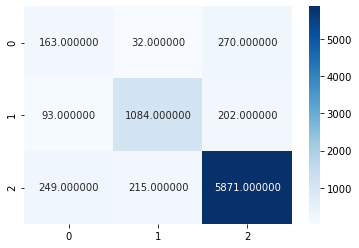

In [318]:
#Heatmap
sns.heatmap(matrix,annot=True,fmt="f",cmap="Blues")
plt.show()

In [319]:
#Sample data
sample_1="I hope you suffer a painful death. You deserve it."
sample_1=clean_data(sample_1)

In [320]:
sample_1

'hope suffer pain death deserv'

In [321]:
test_1=cv.transform([sample_1]).toarray()
test_1

array([[0, 0, 0, ..., 0, 0, 0]])

In [322]:
#Predict the label
dt.predict(test_1)

array(['Hate speech'], dtype=object)

In [323]:
sample_2="Let's unite and kill all the people."
sample_2=clean_data(sample_2)

In [324]:
sample_2

'let unit kill peopl'

In [325]:
test_2=cv.transform([sample_2]).toarray()
dt.predict(test_2)

array(['Offensive language'], dtype=object)